In [1]:
import os
from dotenv import load_dotenv
from typing import TypedDict , Annotated
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph ,START,END



load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
from langchain_groq import ChatGroq
llm=ChatGroq(model="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001E61B242750>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001E61C35A090>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [2]:
def add(a:int,b:int)->int:
    return a+b 

In [3]:
llm_with_tool=llm.bind_tools([add])

In [4]:
from langchain_core.messages import HumanMessage , AIMessage ,AnyMessage
result=llm_with_tool.invoke("what is 2 plus 3")

In [5]:
result.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 3},
  'id': 'je4jkeq9m',
  'type': 'tool_call'}]

In [6]:
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [7]:
def chatbot(state:State):
    
    return{'messages':[llm_with_tool.invoke(state['messages'])]}

In [8]:
graph=StateGraph(State)
graph.add_node('chatbot',chatbot)
graph.add_edge(START,'chatbot')
graph.add_edge('chatbot',END)
workflow=graph.compile()

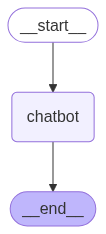

In [9]:
workflow

In [10]:
initial_stae={'messages':'what is 2 pluse 15'}

In [11]:
result=workflow.invoke(initial_stae)

In [13]:
def multiplay(a:int,b:int)->int:
    '''Multiple a and b.
    agrs:
    a:first int
    b:second int
    '''
    return a*b


In [14]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001E61B242750>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001E61C35A090>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [15]:
llmtool=llm.bind_tools([multiplay])

In [16]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
class SState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [17]:
def chatbot7(state:SState):
    return{'messages':[llmtool.invoke(state['messages'])]}

In [19]:
graph=StateGraph(SState)
graph.add_node('chatbot7',chatbot7)
graph.add_node('tools',ToolNode([multiplay]))


graph.add_edge(START,'chatbot7')
graph.add_conditional_edges(
    'chatbot7',
    tools_condition,
)
graph.add_edge('tools',END)
workflow=graph.compile()

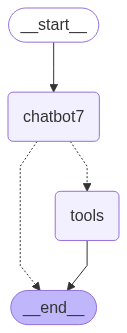

In [20]:
workflow

In [21]:
initial={'messages':'what is 3 multiplay 3'}

In [24]:
workflow.invoke(initial)

{'messages': [HumanMessage(content='what is 3 multiplay 3', additional_kwargs={}, response_metadata={}, id='8fe7ab1a-d738-44b2-854d-0733543bb460'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '3aq0tzbrd', 'function': {'arguments': '{"a":3,"b":3}', 'name': 'multiplay'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 979, 'total_tokens': 1066, 'completion_time': 0.158181818, 'prompt_time': 0.018893536, 'queue_time': 0.255129184, 'total_time': 0.177075354}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--7cb5668a-1a10-42e3-9952-30fb0685b82d-0', tool_calls=[{'name': 'multiplay', 'args': {'a': 3, 'b': 3}, 'id': '3aq0tzbrd', 'type': 'tool_call'}], usage_metadata={'input_tokens': 979, 'output_tokens': 87, 'total_tokens': 1066}),
  ToolMessage(content='9', name='multiplay', id='995d3390-4ae7-4175-adef-7152aba46d6f